In [1]:
# 載入必須使用的 Library
import keras
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


Using TensorFlow backend.


# 作業:
請修改input shape: (Conv2D(64, (3, 3))的設定, 新增一層 Dense 並觀看 model.summary 的輸出

In [2]:
batch_size = 16
num_classes = 10
epochs = 4

In [3]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# build our CNN model, 多加幾層
model = Sequential()

#做第一次積卷，找到 32筆 32*32像素的圖片
model.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=(32, 32,3)))
#做壓縮 變成 32 * 16 * 16
model.add(MaxPooling2D(pool_size=(2, 2)))
#做第一次積卷，找到 64筆 16*16像素的圖片
model.add(Conv2D(64, (3, 3), padding='same'))
#做壓縮 變成 64 * 8 * 8
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)      

In [5]:
# initiate Adam optimizer
opt = keras.optimizers.Adam()

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

model_history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=128, verbose=1)  

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', scores[1])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/4
40000/40000 [==============================] - 82s 2ms/step - loss: 1.5433 - acc: 0.4497 - val_loss: 1.3487 - val_acc: 0.5208
Epoch 2/4
40000/40000 [==============================] - 77s 2ms/step - loss: 1.1867 - acc: 0.5821 - val_loss: 1.0908 - val_acc: 0.6166
Epoch 3/4
40000/40000 [==============================] - 95s 2ms/step - loss: 1.0162 - acc: 0.6443 - val_loss: 1.0652 - val_acc: 0.6283
Epoch 4/4
10000/10000 [==============================] - 7s 718us/step
Test accuracy: 0.6805


In [6]:
def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])

    plt.plot(train_history.history[validation])

    plt.title('Train History')

    plt.ylabel('train')

    plt.xlabel('Epoch')

    plt.legend(['train', 'validation'], loc='center right')

    plt.show()

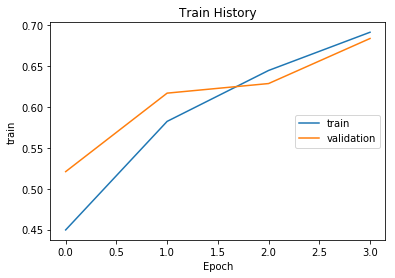

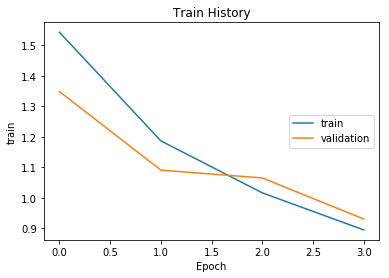

In [8]:
import matplotlib.pyplot as plt
show_train_history(model_history, 'acc','val_acc')
show_train_history(model_history, 'loss','val_loss')